In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler,Normalizer,MaxAbsScaler,RobustScaler
import numpy as np
from sklearn.linear_model import Perceptron

## Question 1


In [119]:
iris =load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Question 2


In [120]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Question 3


C:\Users\This PC\AppData\Local\Temp\ipykernel_16148\667668840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['binary_target']= df_binary['target_names'].map({'setosa':0,'versicolor':1})


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,binary_target
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
5,5.4,3.9,1.7,0.4,0,setosa,0
6,4.6,3.4,1.4,0.3,0,setosa,0
7,5.0,3.4,1.5,0.2,0,setosa,0
8,4.4,2.9,1.4,0.2,0,setosa,0
9,4.9,3.1,1.5,0.1,0,setosa,0


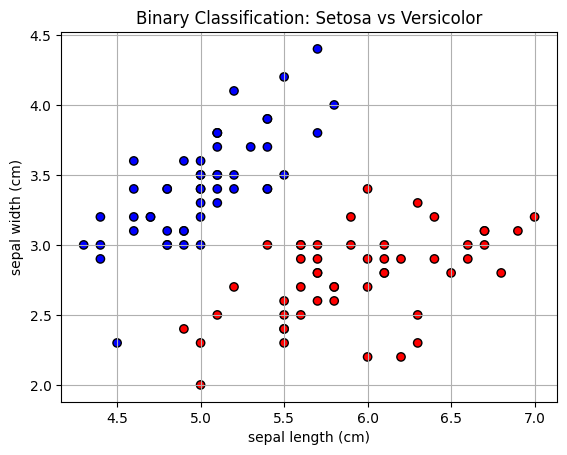

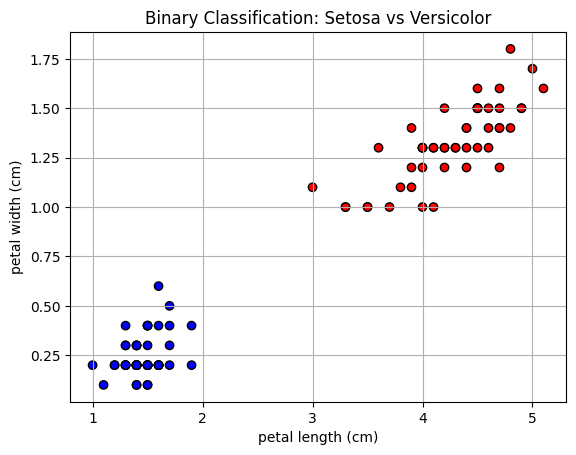

In [121]:
df['target'] = iris.target #making an extra column for class with numerics
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x]) #making another with class names

#now we will exclude virginica
df_binary = df[df['target_names'].isin(['setosa','versicolor'])] #keeping only the first two classes
df_binary['binary_target']= df_binary['target_names'].map({'setosa':0,'versicolor':1})
display(df_binary.head(10)) #checking 

#scatter plot for sepal width and length
plt.scatter(df_binary.iloc[:,0], df_binary.iloc[:,1], c=df_binary['target'], cmap='bwr', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Binary Classification: Setosa vs Versicolor')
plt.grid(True)
plt.show()

#scatter plot for petal length and width
plt.scatter(df_binary.iloc[:,2], df_binary.iloc[:,3], c=df_binary['target'], cmap='bwr', edgecolors='k')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Binary Classification: Setosa vs Versicolor')
plt.grid(True)
plt.show()

### Question 4


In [122]:
x = df_binary.drop(['target','target_names'],axis=1) # extracting features
y = df_binary['binary_target'] # target value


### Question 5


In [123]:
#spliting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=3)


### Question 6


In [124]:
percept = Perceptron(max_iter= 1000,tol=0.001,random_state=3) #the model will stop training after the fault tolerance exceeds 0.001
percept.fit(x_train,y_train) #since its supervised
y_predict=percept.predict(x_test)

### Question 7


In [125]:
print(f"Accuracy after using perceptron : {accuracy_score(y_test,y_predict)}")
print(f"Precision after using perceptron : {precision_score(y_test,y_predict)}")
print(f"Recall score after using perceptron : {recall_score(y_test,y_predict)}")
print(f"F1 score after using perceptron : {f1_score(y_test,y_predict)}")

Accuracy after using perceptron : 1.0
Precision after using perceptron : 1.0
Recall score after using perceptron : 1.0
F1 score after using perceptron : 1.0


### Question 8


In [126]:
#perceptron is an supervised learning algorithm for binary classifiers
#now we will build a perceptron from scratch

def unit_step_func(x):
    return np.where(x>0,1,0)

class perceptron:
    def __init__(self,learning_rate=0.00001,iterations=1000):
        self.lr = learning_rate
        self.iters = iterations
        self.activation_function = unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Ensure X and y are numpy arrays of type float
        X = np.asarray(X).astype(float)
        y = np.asarray(y)
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0, 1, 0)

        for _ in range(self.iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        X = np.asarray(X).astype(float)
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
    
#now we will train the data on this perceptron
per = perceptron(learning_rate=0.01,iterations = 1500)
per.fit(x_train,y_train)
y_prediction = per.predict(x_test)



### Question 9


In [ ]:

print(f"Accuracy after using new perceptron : {accuracy_score(y_test,y_prediction)}")
print(f"Precision after using new perceptron : {precision_score(y_test,y_prediction)}")
print(f"Recall score after using new perceptron : {recall_score(y_test,y_prediction)}")
print(f"F1 score after using new perceptron : {f1_score(y_test,y_prediction)}")

Accuracy after using perceptron : 1.0
Precision after using perceptron : 1.0
Recall score after using perceptron : 1.0
F1 score after using perceptron : 1.0
